In [ ]:
!pip install ucimlrepo
!pip install dcor

In [2]:
# Have to restart the kernel after running this
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

     \ 17.8 MB 22.1 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 21.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 293.3/293.3 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 23.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 46.1 MB/s eta 0:00:00
  Created wheel for ydata-profiling: filename=ydata_profiling-0.0.dev0-py2.py3-none-any.whl size=357887 sha256=4275c0957ed602d9d12c0597dee3a1e76f56b72b1942bcb146ba574a9a764e53
  Stored in directory: /tmp/pip-ephem-wheel-cache-3iqszmb_/wheels/07/29/61/f533cc7cbd0a97efb2d1b94d3254a3e859a949367ba842577b
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=a8f10e3a0f104476efce5bf96707282fed1758a8175e7f72b1de8f198701d0f6
  Stored in director

In [3]:
# Juliet's imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dcor
from datetime import datetime
from ydata_profiling import ProfileReport
from ucimlrepo import fetch_ucirepo

In [44]:
# Albert's imports
import tensorflow as tf

In [5]:
# Fetch dataset from UCI repo
bike_sharing_dataset = fetch_ucirepo(id=275)

# Print variable info
with pd.option_context('display.max_colwidth', None):
  print(bike_sharing_dataset.variables)

# Get full dataset as a dataframe
bike_sharing_df = bike_sharing_dataset.data.original

          name     role         type demographic  \
0      instant       ID      Integer        None   
1       dteday  Feature         Date        None   
2       season  Feature  Categorical        None   
3           yr  Feature  Categorical        None   
4         mnth  Feature  Categorical        None   
5           hr  Feature  Categorical        None   
6      holiday  Feature       Binary        None   
7      weekday  Feature  Categorical        None   
8   workingday  Feature       Binary        None   
9   weathersit  Feature  Categorical        None   
10        temp  Feature   Continuous        None   
11       atemp  Feature   Continuous        None   
12         hum  Feature   Continuous        None   
13   windspeed  Feature   Continuous        None   
14      casual    Other      Integer        None   
15  registered    Other      Integer        None   
16         cnt   Target      Integer        None   

                                                               

In [6]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [24]:
bike_sharing_df.head()

dteday  holiday  workingday  temp   atemp   hum  windspeed  casual  \
0  2011-01-01        0           0  0.24  0.2879  0.81        0.0       3   
1  2011-01-01        0           0  0.22  0.2727  0.80        0.0       8   
2  2011-01-01        0           0  0.22  0.2727  0.80        0.0       5   
3  2011-01-01        0           0  0.24  0.2879  0.75        0.0       3   
4  2011-01-01        0           0  0.24  0.2879  0.75        0.0       0   

   registered  cnt  ... weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0          13   16  ...         0          0          0          0          0   
1          32   40  ...         0          0          0          0          0   
2          27   32  ...         0          0          0          0          0   
3          10   13  ...         0          0          0          0          0   
4           1    1  ...         0          0          0          0          0   

   weekday_6  weathersit_1  weathersit_2  weathersit_3  weathersit_4  
0          1             1             0             0             0  
1          1             1             0             0             0  
2          1             1             0             0             0  
3          1             1             0             0             0  
4          1             1             0             0             0  

[5 rows x 63 columns]

In [8]:
bike_sharing_df.describe()

instant        season            yr          mnth            hr  \
count  17379.0000  17379.000000  17379.000000  17379.000000  17379.000000   
mean    8690.0000      2.501640      0.502561      6.537775     11.546752   
std     5017.0295      1.106918      0.500008      3.438776      6.914405   
min        1.0000      1.000000      0.000000      1.000000      0.000000   
25%     4345.5000      2.000000      0.000000      4.000000      6.000000   
50%     8690.0000      3.000000      1.000000      7.000000     12.000000   
75%    13034.5000      3.000000      1.000000     10.000000     18.000000   
max    17379.0000      4.000000      1.000000     12.000000     23.000000   

            holiday       weekday    workingday    weathersit          temp  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.028770      3.003683      0.682721      1.425283      0.496987   
std        0.167165      2.005771      0.465431      0.639357      0.192556   
min        0.000000      0.000000      0.000000      1.000000      0.020000   
25%        0.000000      1.000000      0.000000      1.000000      0.340000   
50%        0.000000      3.000000      1.000000      1.000000      0.500000   
75%        0.000000      5.000000      1.000000      2.000000      0.660000   
max        1.000000      6.000000      1.000000      4.000000      1.000000   

              atemp           hum     windspeed        casual    registered  \
count  17379.000000  17379.000000  17379.000000  17379.000000  17379.000000   
mean       0.475775      0.627229      0.190098     35.676218    153.786869   
std        0.171850      0.192930      0.122340     49.305030    151.357286   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.333300      0.480000      0.104500      4.000000     34.000000   
50%        0.484800      0.630000      0.194000     17.000000    115.000000   
75%        0.621200      0.780000      0.253700     48.000000    220.000000   
max        1.000000      1.000000      0.850700    367.000000    886.000000   

                cnt  
count  17379.000000  
mean     189.463088  
std      181.387599  
min        1.000000  
25%       40.000000  
50%      142.000000  
75%      281.000000  
max      977.000000

In [9]:
# Convert categorical variables to be of type category
bike_sharing_df['hr'] = bike_sharing_df['hr'].astype('category')
bike_sharing_df['mnth'] = bike_sharing_df['mnth'].astype('category')
bike_sharing_df['weekday'] = bike_sharing_df['weekday'].astype('category')
bike_sharing_df['season'] = bike_sharing_df['season'].astype('category')
bike_sharing_df['weathersit'] = bike_sharing_df['weathersit'].astype('category')

In [10]:
# Drop instant because it is an ID
bike_sharing_df.drop(columns=['instant'], axis=1, inplace=True)

# Drop yr because it only tells us if the year is 2011 or 2012
bike_sharing_df.drop(columns=['yr'], axis=1, inplace=True)

In [11]:
# Create a new datetime column
def getdatetime(row):
    year, month, day = row[0].split('-')
    hour = row[1]
    return datetime(int(year), int(month), int(day), int(hour))

bike_sharing_df['datetime'] = bike_sharing_df[['dteday', 'hr']].apply(getdatetime, axis=1)

In [12]:
# Introduce a new feature that represents the ratio of casual to registered users
bike_sharing_df['casual_vs_registered'] = bike_sharing_df['casual']/bike_sharing_df['registered']

In [13]:
# Check distribution for new variable
print(bike_sharing_df['casual_vs_registered'].describe())

count    1.737900e+04
mean              inf
std               NaN
min      0.000000e+00
25%      6.779661e-02
50%      1.721854e-01
75%      3.400000e-01
max               inf
Name: casual_vs_registered, dtype: float64


In [14]:
# Handle cases where either casual or registered is 0 by replacing with 1s
casual_temp = bike_sharing_df['casual'].replace(0, 1)
registered_temp = bike_sharing_df['registered'].replace(0, 1)

bike_sharing_df['casual_vs_registered'] = casual_temp/registered_temp

count    17379.000000
mean         0.272440
std          0.283652
min          0.002237
25%          0.091500
50%          0.194030
75%          0.358491
max          7.000000
Name: casual_vs_registered, dtype: float64


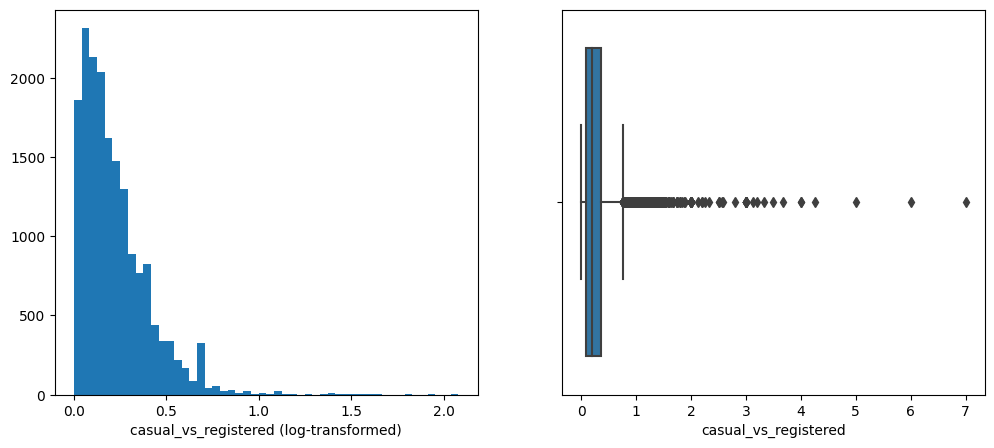

In [15]:
# Reinspect distribution
print(bike_sharing_df['casual_vs_registered'].describe())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
ax1.hist(np.log1p(bike_sharing_df['casual_vs_registered']), bins=50)
ax1.set_xlabel('casual_vs_registered (log-transformed)')

sns.boxplot(x=bike_sharing_df['casual_vs_registered'], ax=ax2)
plt.show()

In [16]:
# Examine data after changes
bike_sharing_df.head()

dteday season mnth hr  holiday weekday  workingday weathersit  temp  \
0  2011-01-01      1    1  0        0       6           0          1  0.24   
1  2011-01-01      1    1  1        0       6           0          1  0.22   
2  2011-01-01      1    1  2        0       6           0          1  0.22   
3  2011-01-01      1    1  3        0       6           0          1  0.24   
4  2011-01-01      1    1  4        0       6           0          1  0.24   

    atemp   hum  windspeed  casual  registered  cnt            datetime  \
0  0.2879  0.81        0.0       3          13   16 2011-01-01 00:00:00   
1  0.2727  0.80        0.0       8          32   40 2011-01-01 01:00:00   
2  0.2727  0.80        0.0       5          27   32 2011-01-01 02:00:00   
3  0.2879  0.75        0.0       3          10   13 2011-01-01 03:00:00   
4  0.2879  0.75        0.0       0           1    1 2011-01-01 04:00:00   

   casual_vs_registered  
0              0.230769  
1              0.250000  
2              0.185185  
3              0.300000  
4              1.000000

In [17]:
# Generate profiling report on the cleaned data
profile = ProfileReport(bike_sharing_df, title="Pandas Profiling Report")
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [18]:
profile.to_file('./bike-sharing-profile.html')

/usr/local/lib/python3.10/dist-packages/ydata_profiling/profile_report.py:354: UserWarning: Try running command: 'pip install --upgrade Pillow' to avoid ValueError
  warnings.warn(


Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
bike_sharing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   dteday                17379 non-null  object        
 1   season                17379 non-null  category      
 2   mnth                  17379 non-null  category      
 3   hr                    17379 non-null  category      
 4   holiday               17379 non-null  int64         
 5   weekday               17379 non-null  category      
 6   workingday            17379 non-null  int64         
 7   weathersit            17379 non-null  category      
 8   temp                  17379 non-null  float64       
 9   atemp                 17379 non-null  float64       
 10  hum                   17379 non-null  float64       
 11  windspeed             17379 non-null  float64       
 12  casual                17379 non-null  int64         
 13  registered      

In [20]:
# One hot encode categorical features
bike_sharing_df = pd.get_dummies(bike_sharing_df, columns=['season', 'mnth', 'hr', 'weekday', 'weathersit'])

In [21]:
bike_sharing_df.head()

dteday  holiday  workingday  temp   atemp   hum  windspeed  casual  \
0  2011-01-01        0           0  0.24  0.2879  0.81        0.0       3   
1  2011-01-01        0           0  0.22  0.2727  0.80        0.0       8   
2  2011-01-01        0           0  0.22  0.2727  0.80        0.0       5   
3  2011-01-01        0           0  0.24  0.2879  0.75        0.0       3   
4  2011-01-01        0           0  0.24  0.2879  0.75        0.0       0   

   registered  cnt  ... weekday_1  weekday_2  weekday_3  weekday_4  weekday_5  \
0          13   16  ...         0          0          0          0          0   
1          32   40  ...         0          0          0          0          0   
2          27   32  ...         0          0          0          0          0   
3          10   13  ...         0          0          0          0          0   
4           1    1  ...         0          0          0          0          0   

   weekday_6  weathersit_1  weathersit_2  weathersit_3  weathersit_4  
0          1             1             0             0             0  
1          1             1             0             0             0  
2          1             1             0             0             0  
3          1             1             0             0             0  
4          1             1             0             0             0  

[5 rows x 63 columns]

In [22]:
bike_sharing_df.columns

Index(['dteday', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt', 'datetime', 'casual_vs_registered',
       'season_1', 'season_2', 'season_3', 'season_4', 'mnth_1', 'mnth_2',
       'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8', 'mnth_9',
       'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2', 'hr_3', 'hr_4',
       'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10', 'hr_11', 'hr_12',
       'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18', 'hr_19', 'hr_20',
       'hr_21', 'hr_22', 'hr_23', 'weekday_0', 'weekday_1', 'weekday_2',
       'weekday_3', 'weekday_4', 'weekday_5', 'weekday_6', 'weathersit_1',
       'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')

In [23]:
# Distance correlation for casual and continuous independent variables
print("Correlations for casual:")
print(f"Correlation for temp and casual: {dcor.distance_correlation(bike_sharing_df['temp'], bike_sharing_df['casual'])}")

print(f"Correlation for atemp and casual: {dcor.distance_correlation(bike_sharing_df['atemp'], bike_sharing_df['casual'])}")

print(f"Correlation for hum and casual: {dcor.distance_correlation(bike_sharing_df['hum'], bike_sharing_df['casual'])}")

print(f"Correlation for windspeed and casual: {dcor.distance_correlation(bike_sharing_df['windspeed'], bike_sharing_df['casual'])}")

# Distance correlation for registered and continuous independent variables
print("Correlations for registered:")
print(f"Correlation for temp and registered: {dcor.distance_correlation(bike_sharing_df['temp'], bike_sharing_df['registered'])}")

print(f"Correlation for atemp and registered: {dcor.distance_correlation(bike_sharing_df['atemp'], bike_sharing_df['registered'])}")

print(f"Correlation for hum and registered: {dcor.distance_correlation(bike_sharing_df['hum'], bike_sharing_df['registered'])}")

print(f"Correlation for windspeed and registered: {dcor.distance_correlation(bike_sharing_df['windspeed'], bike_sharing_df['registered'])}")

# Distance correlation for cnt and continuous independent variables
print("Correlations for cnt:")
print(f"Correlation for temp and cnt: {dcor.distance_correlation(bike_sharing_df['temp'], bike_sharing_df['cnt'])}")

print(f"Correlation for atemp and cnt: {dcor.distance_correlation(bike_sharing_df['atemp'], bike_sharing_df['cnt'])}")

print(f"Correlation for hum and cnt: {dcor.distance_correlation(bike_sharing_df['hum'], bike_sharing_df['cnt'])}")

print(f"Correlation for windspeed and cnt: {dcor.distance_correlation(bike_sharing_df['windspeed'], bike_sharing_df['cnt'])}")

# Distance correlation for casual_vs_registered and continuous independent variables
print("Correlations for casual_vs_registered:")
print(f"Correlation for temp and casual_vs_registered: {dcor.distance_correlation(bike_sharing_df['temp'], bike_sharing_df['casual_vs_registered'])}")

print(f"Correlation for atemp and casual_vs_registered: {dcor.distance_correlation(bike_sharing_df['atemp'], bike_sharing_df['casual_vs_registered'])}")

print(f"Correlation for hum and casual_vs_registered: {dcor.distance_correlation(bike_sharing_df['hum'], bike_sharing_df['casual_vs_registered'])}")

print(f"Correlation for windspeed and casual_vs_registered: {dcor.distance_correlation(bike_sharing_df['windspeed'], bike_sharing_df['casual_vs_registered'])}")

/usr/local/lib/python3.10/dist-packages/dcor/_fast_dcov_avl.py:554: UserWarning: Falling back to uncompiled AVL fast distance covariance terms because of TypeError exception raised: No matching definition for argument type(s) array(float64, 1d, C), array(int64, 1d, C), bool. Rembember: only floating point values can be used in the compiled implementations.
  warnings.warn(


Correlations for casual:


/usr/local/lib/python3.10/dist-packages/dcor/_dcor_internals.py:188: RuntimeWarning: overflow encountered in long_scalars
  third_term = a_total_sum * b_total_sum / n_samples


Correlation for temp and casual: 0.4381158070343228
Correlation for atemp and casual: 0.43990207507786117
Correlation for hum and casual: 0.3129375639572588
Correlation for windspeed and casual: 0.09809134516206383
Correlations for registered:
Correlation for temp and registered: 0.2894652469831514
Correlation for atemp and registered: 0.292248937599841
Correlation for hum and registered: 0.25670994855052054
Correlation for windspeed and registered: 0.09102353010983961
Correlations for cnt:
Correlation for temp and cnt: 0.344684563080449
Correlation for atemp and cnt: 0.3476517748735718
Correlation for hum and cnt: 0.2840572726062154
Correlation for windspeed and cnt: 0.09726780617032511
Correlations for casual_vs_registered:
Correlation for temp and casual_vs_registered: 0.3095473112002956
Correlation for atemp and casual_vs_registered: 0.3112230308321759
Correlation for hum and casual_vs_registered: 0.1152993234228237
Correlation for windspeed and casual_vs_registered: 0.023171836523

Time Series CNN:

In [27]:
bike_sharing_df

dteday  holiday  workingday  temp   atemp   hum  windspeed  casual  \
0      2011-01-01        0           0  0.24  0.2879  0.81     0.0000       3   
1      2011-01-01        0           0  0.22  0.2727  0.80     0.0000       8   
2      2011-01-01        0           0  0.22  0.2727  0.80     0.0000       5   
3      2011-01-01        0           0  0.24  0.2879  0.75     0.0000       3   
4      2011-01-01        0           0  0.24  0.2879  0.75     0.0000       0   
...           ...      ...         ...   ...     ...   ...        ...     ...   
17374  2012-12-31        0           1  0.26  0.2576  0.60     0.1642      11   
17375  2012-12-31        0           1  0.26  0.2576  0.60     0.1642       8   
17376  2012-12-31        0           1  0.26  0.2576  0.60     0.1642       7   
17377  2012-12-31        0           1  0.26  0.2727  0.56     0.1343      13   
17378  2012-12-31        0           1  0.26  0.2727  0.65     0.1343      12   

       registered  cnt  ... weekday_1  weekday_2  weekday_3  weekday_4  \
0              13   16  ...         0          0          0          0   
1              32   40  ...         0          0          0          0   
2              27   32  ...         0          0          0          0   
3              10   13  ...         0          0          0          0   
4               1    1  ...         0          0          0          0   
...           ...  ...  ...       ...        ...        ...        ...   
17374         108  119  ...         1          0          0          0   
17375          81   89  ...         1          0          0          0   
17376          83   90  ...         1          0          0          0   
17377          48   61  ...         1          0          0          0   
17378          37   49  ...         1          0          0          0   

       weekday_5  weekday_6  weathersit_1  weathersit_2  weathersit_3  \
0              0          1             1             0             0   
1              0          1             1             0             0   
2              0          1             1             0             0   
3              0          1             1             0             0   
4              0          1             1             0             0   
...          ...        ...           ...           ...           ...   
17374          0          0             0             1             0   
17375          0          0             0             1             0   
17376          0          0             1             0             0   
17377          0          0             1             0             0   
17378          0          0             1             0             0   

       weathersit_4  
0                 0  
1                 0  
2                 0  
3                 0  
4                 0  
...             ...  
17374             0  
17375             0  
17376             0  
17377             0  
17378             0  

[17379 rows x 63 columns]

In [29]:
bike_sharing_df.dtypes

dteday           object
holiday           int64
workingday        int64
temp            float64
atemp           float64
                 ...   
weekday_6         uint8
weathersit_1      uint8
weathersit_2      uint8
weathersit_3      uint8
weathersit_4      uint8
Length: 63, dtype: object

In [33]:
#Get datetime
date_time = pd.to_datetime(bike_sharing_df['dteday'], format='%Y.%m.%d')

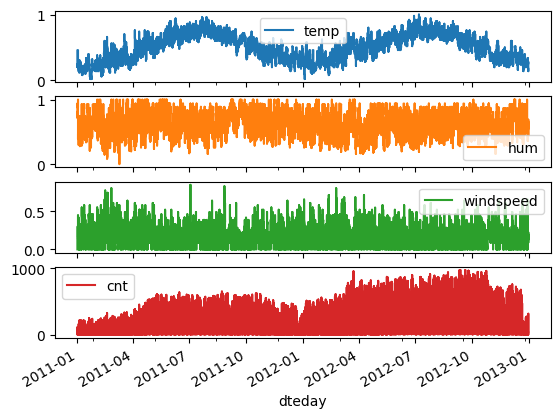

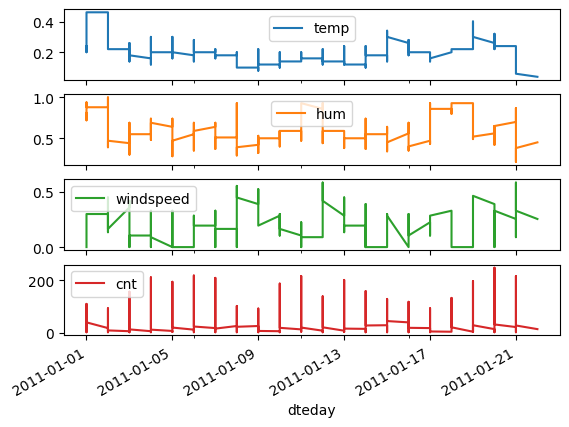

In [39]:
#Feature evolution over time
plot_cols = ['temp', 'hum', 'windspeed', 'cnt']
plot_features = bike_sharing_df[plot_cols]
plot_features.index = date_time
_ = plot_features.plot(subplots=True)

plot_features = bike_sharing_df[plot_cols][:480]
plot_features.index = date_time[:480]
_ = plot_features.plot(subplots=True)

In [40]:
bike_sharing_df.describe().transpose()

count      mean       std   min     25%     50%     75%  max
holiday       17379.0  0.028770  0.167165  0.00  0.0000  0.0000  0.0000  1.0
workingday    17379.0  0.682721  0.465431  0.00  0.0000  1.0000  1.0000  1.0
temp          17379.0  0.496987  0.192556  0.02  0.3400  0.5000  0.6600  1.0
atemp         17379.0  0.475775  0.171850  0.00  0.3333  0.4848  0.6212  1.0
hum           17379.0  0.627229  0.192930  0.00  0.4800  0.6300  0.7800  1.0
...               ...       ...       ...   ...     ...     ...     ...  ...
weekday_6     17379.0  0.144542  0.351649  0.00  0.0000  0.0000  0.0000  1.0
weathersit_1  17379.0  0.656712  0.474820  0.00  0.0000  1.0000  1.0000  1.0
weathersit_2  17379.0  0.261465  0.439445  0.00  0.0000  0.0000  1.0000  1.0
weathersit_3  17379.0  0.081650  0.273839  0.00  0.0000  0.0000  0.0000  1.0
weathersit_4  17379.0  0.000173  0.013138  0.00  0.0000  0.0000  0.0000  1.0

[61 rows x 8 columns]

In [41]:
#Convert timestamp to seconds
timestamp_s = date_time.map(pd.Timestamp.timestamp)

In [42]:
timestamp_s

0        1.293840e+09
1        1.293840e+09
2        1.293840e+09
3        1.293840e+09
4        1.293840e+09
             ...     
17374    1.356912e+09
17375    1.356912e+09
17376    1.356912e+09
17377    1.356912e+09
17378    1.356912e+09
Name: dteday, Length: 17379, dtype: float64

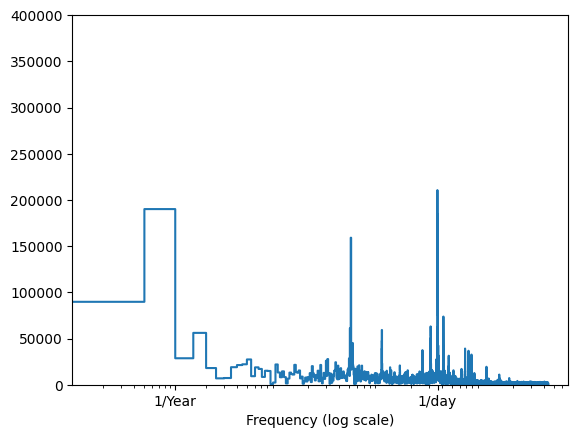

In [62]:
#Fast fourier transform: feature frequency
fft = tf.signal.rfft(bike_sharing_df['casual'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(bike_sharing_df['temp'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

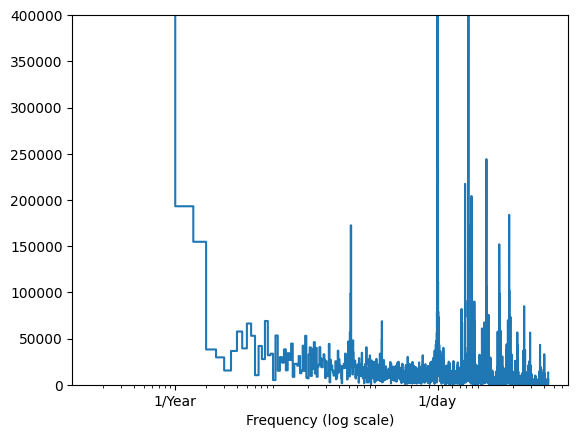

In [61]:
fft = tf.signal.rfft(bike_sharing_df['registered'])
f_per_dataset = np.arange(0, len(fft))

n_samples_h = len(bike_sharing_df['temp'])
hours_per_year = 24*365.2524
years_per_dataset = n_samples_h/(hours_per_year)

f_per_year = f_per_dataset/years_per_dataset
plt.step(f_per_year, np.abs(fft))
plt.xscale('log')
plt.ylim(0, 400000)
plt.xlim([0.1, max(plt.xlim())])
plt.xticks([1, 365.2524], labels=['1/Year', '1/day'])
_ = plt.xlabel('Frequency (log scale)')

In [63]:
#Split data 70% training, 20% validation, 10% testing
column_indices = {name: i for i, name in enumerate(bike_sharing_df.columns)}

n = len(bike_sharing_df)
train_df = bike_sharing_df[0:int(n*0.7)]
val_df = bike_sharing_df[int(n*0.7):int(n*0.9)]
test_df = bike_sharing_df[int(n*0.9):]

num_features = bike_sharing_df.shape[1]

In [65]:
bike_sharing_df.dtypes

dteday           object
holiday           int64
workingday        int64
temp            float64
atemp           float64
                 ...   
weekday_6         uint8
weathersit_1      uint8
weathersit_2      uint8
weathersit_3      uint8
weathersit_4      uint8
Length: 63, dtype: object

In [ ]:
# #Data normalization
# train_mean = train_df.mean()
# train_std = train_df.std()

# train_df = (train_df - train_mean) / train_std
# val_df = (val_df - train_mean) / train_std
# test_df = (test_df - train_mean) / train_std